<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Trabajo Practico</h3>
    <h5>Grupo 4</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Braian Drago <p>
        <p>Integrantes: Garnica Hernán - Scime Silvia
</div>

Importamos modulos a utilizar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

####  Leemos los datos a trabajar


In [2]:
url='https://raw.githubusercontent.com/jiang-011/AST_G4/main/dataset/Kilometros_TP.csv'
raw_csv_data = pd.read_csv(url, sep=',', decimal='.')
df_km=raw_csv_data.copy()

#### Breve resumen del dataset


In [3]:
print(df_km.columns)

Index(['Fecha', 'KM'], dtype='object')


In [4]:
df_km.describe(include='all')

,Fecha,KM
count,761,761.000000
unique,761,NaN
top,2023-03-18,NaN
freq,1,NaN
mean,NaN,73506.130891
std,NaN,23975.028897
min,NaN,18.976000
25%,NaN,52063.096000
50%,NaN,75190.790000
75%,NaN,96904.004000


In [5]:
df_km.head(10)

,Fecha,KM
0,2023-03-18,66686.513
1,2023-05-09,105009.277
2,2023-02-28,80447.065
3,2023-03-06,103403.154
4,2023-03-10,102574.717
5,2023-05-11,104149.399
6,2023-03-21,102278.464
7,2023-04-24,103627.203
8,2023-04-18,103366.435
9,2023-05-31,103403.519


In [6]:
df_km.tail(10)

,Fecha,KM
751,2022-04-09,48305.086
752,2022-01-29,47482.883
753,2023-07-23,45117.943
754,2022-01-11,50103.326
755,2022-12-18,17554.422
756,2022-04-26,23536.646
757,2023-06-13,47.508
758,2022-10-12,49.673
759,2022-05-17,54.524
760,2022-10-13,18.976


Adaptamos el dataset para trabajarlo segun sus series temporales

In [7]:
df_km.Fecha = pd.to_datetime(df_km.Fecha, dayfirst = True)

In [8]:
df_km.Fecha.describe()

count                              761
mean     2022-10-15 04:07:53.061760768
min                2021-09-30 00:00:00
25%                2022-04-08 00:00:00
50%                2022-10-15 00:00:00
75%                2023-04-23 00:00:00
max                2023-10-31 00:00:00
Name: Fecha, dtype: object

Aplicamos filtro de 2 años de duración al campo Fecha (2021-10-01-2023-10-31)

In [9]:
df = df_km.loc['2021-10-01':'2023-10-31']
df_km = df_km.sort_values(by=['Fecha'], ascending=True)

In [10]:
df_km.head(10)

,Fecha,KM
491,2021-09-30,72933.600
323,2021-10-01,73177.190
272,2021-10-02,49300.256
234,2021-10-03,34024.972
315,2021-10-04,73453.515
152,2021-10-05,73722.635
80,2021-10-06,73465.563
572,2021-10-07,49462.478
265,2021-10-08,35282.426
307,2021-10-09,48384.782


In [11]:
df_km.tail(10)

,Fecha,KM
333,2023-10-22,47321.881
450,2023-10-23,101572.556
594,2023-10-24,101884.237
52,2023-10-25,102691.406
403,2023-10-26,102253.728
75,2023-10-27,102590.551
337,2023-10-28,62622.827
748,2023-10-29,44060.420
390,2023-10-30,101843.308
196,2023-10-31,102381.640


In [12]:
from skimpy import skim

In [13]:
skim(df_km)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 761    │ │ datetime64  │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ KM              │   0 │      0 │   74000 │   24000 │  19 │   52000 │   75000 │   97000 │  110000 │  ▁▅▃▅▇  │  │
│ └─────────────────┴─────┴────────┴─────────┴─────────┴─────┴─────────┴─────────┴─────────┴─────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ Fecha                  │      0 │         0 │     2021-09-30      │     2023-10-31      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Seteamos como index del dataset segun el dia

In [14]:
df_km.set_index("Fecha",inplace=True)

In [15]:
df_km.head()

,KM
Fecha,
2021-09-30,72933.600
2021-10-01,73177.190
2021-10-02,49300.256
2021-10-03,34024.972
2021-10-04,73453.515


#### Adaptamos el datset a la frecuencia diaria

In [16]:
df_km=df_km.asfreq('d')
df_km

,KM
Fecha,
2021-09-30,72933.600
2021-10-01,73177.190
2021-10-02,49300.256
2021-10-03,34024.972
2021-10-04,73453.515
...,...
2023-10-27,102590.551
2023-10-28,62622.827
2023-10-29,44060.420


Verificamos existencia de fechas nulas

In [17]:
df_km.isna().sum()

KM    1
dtype: int64

Obtenemos posición del registro con fecha nula

In [18]:
fila_con_na = df_km[df_km.isna().any(axis=1)]

In [19]:
print(fila_con_na)

            KM
Fecha         
2023-06-22 NaN


Este día no aparece en el dataset, lo borramos para poder seguir con el análisis.

In [20]:
df_km=df_km.dropna()

Volvemos a verificar existencia de fechas nulas

In [21]:
df_km.isna().sum()

KM    0
dtype: int64

Visualizamos una vez mas el dataset, pero esta vez teniendo en cuenta la serie temporal

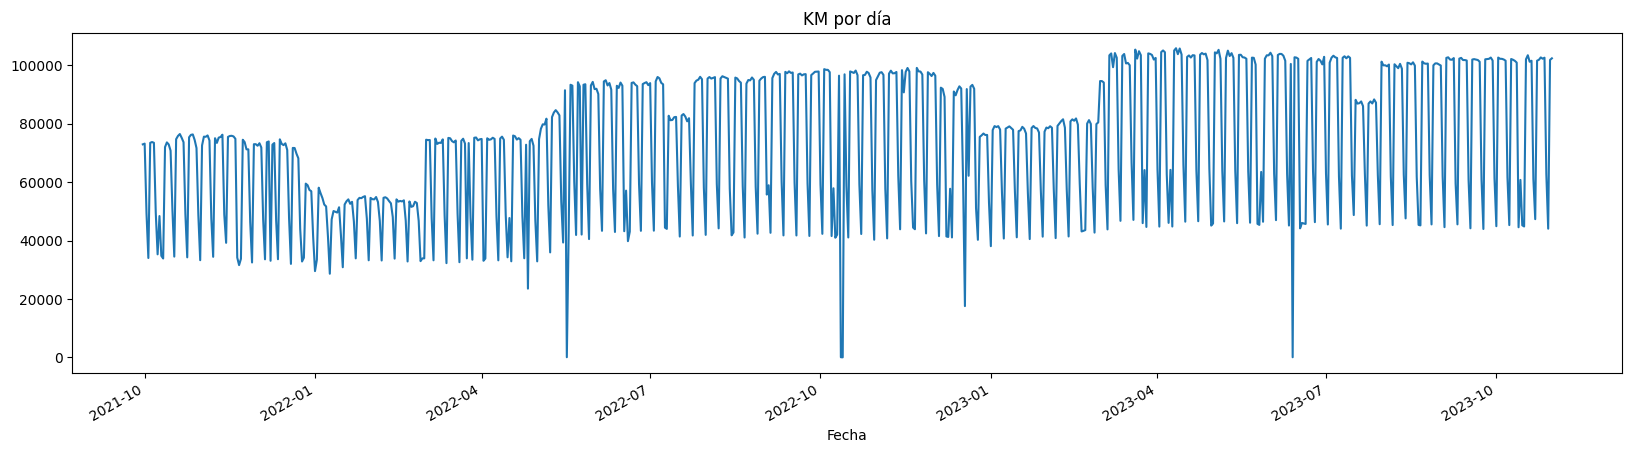

In [22]:
df_km.KM.plot(figsize=(20,5), title = "KM por día")
plt.show()

*COMENTARIO *

El gráfico hace referencia a los kms diarios recorridos por las líneas Urbanas en la ciudad de Buenos Aires. Es la primer visualización de la serie de tiempo y se aprecian algunos valores iguales a 0 kms recorridos en determinadas fechas. Habrá que seguir estudiando a fin de decidir qué pasa con esos datos y el tratamiento pertinente de los mismos. 

<Axes: ylabel='KM'>

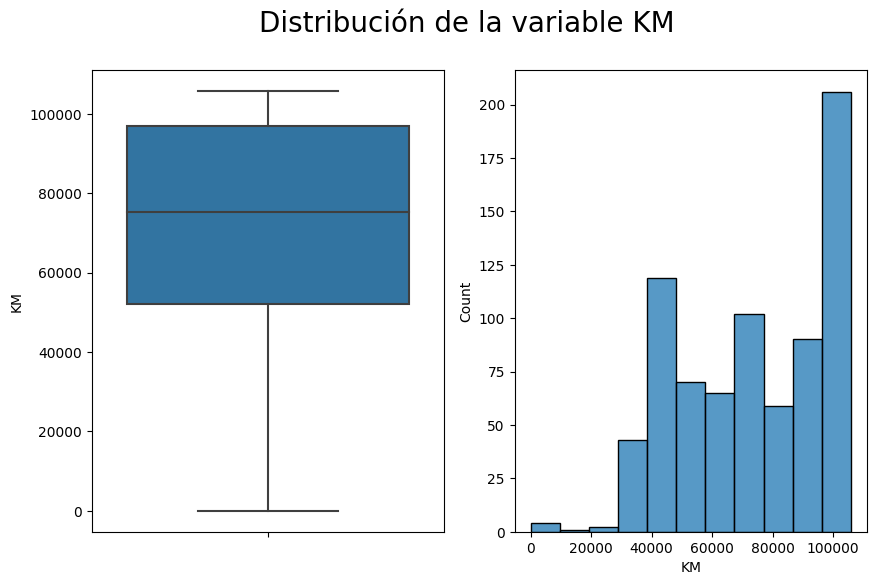

In [23]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle('Distribución de la variable KM', fontsize = 20)


sns.histplot(data = df_km, x="KM", ax = axs[1])
sns.boxplot(y = "KM", data = df_km, ax = axs[0])


La variable parece no seguir una distribución en particular, los kms recorridos por día se encuentran entre 50.000 y 100.000,
siendo este último valor el más frecuente.

Descomposición de Series Temporales

In [24]:
# Modulo para uso exclusivo aqui
from statsmodels.tsa.seasonal import seasonal_decompose

Descomposicion Aditiva

In [25]:
df_km = df_km.asfreq('d')
df_km = df_km.fillna(1)

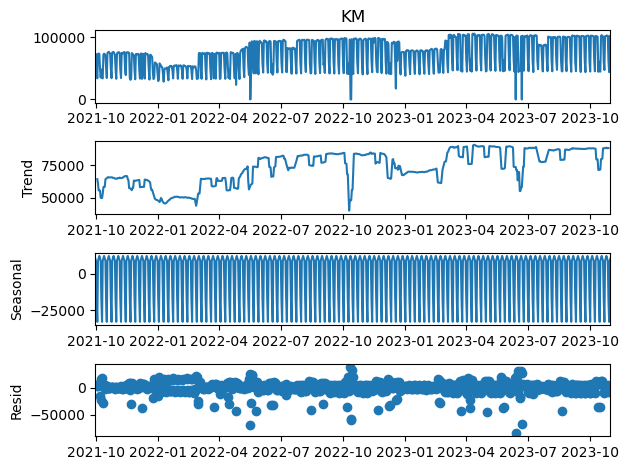

In [104]:
s_dec_additive = seasonal_decompose(df_km.KM, model = "adittive")
s_dec_additive.plot()
plt.show()

Al hacer la descomposición de la serie se pueden observar 4 características:
- El ciclo
- La tendencia   
- La estacionalidad: En este caso no la hay, por eso se ve asi la gráfica.
- Movimientos irregulares ( el error )

Descomposicion Multiplicativa

In [26]:
import matplotlib

matplotlib.rcParams['figure.figsize']=[12.0,8.0]

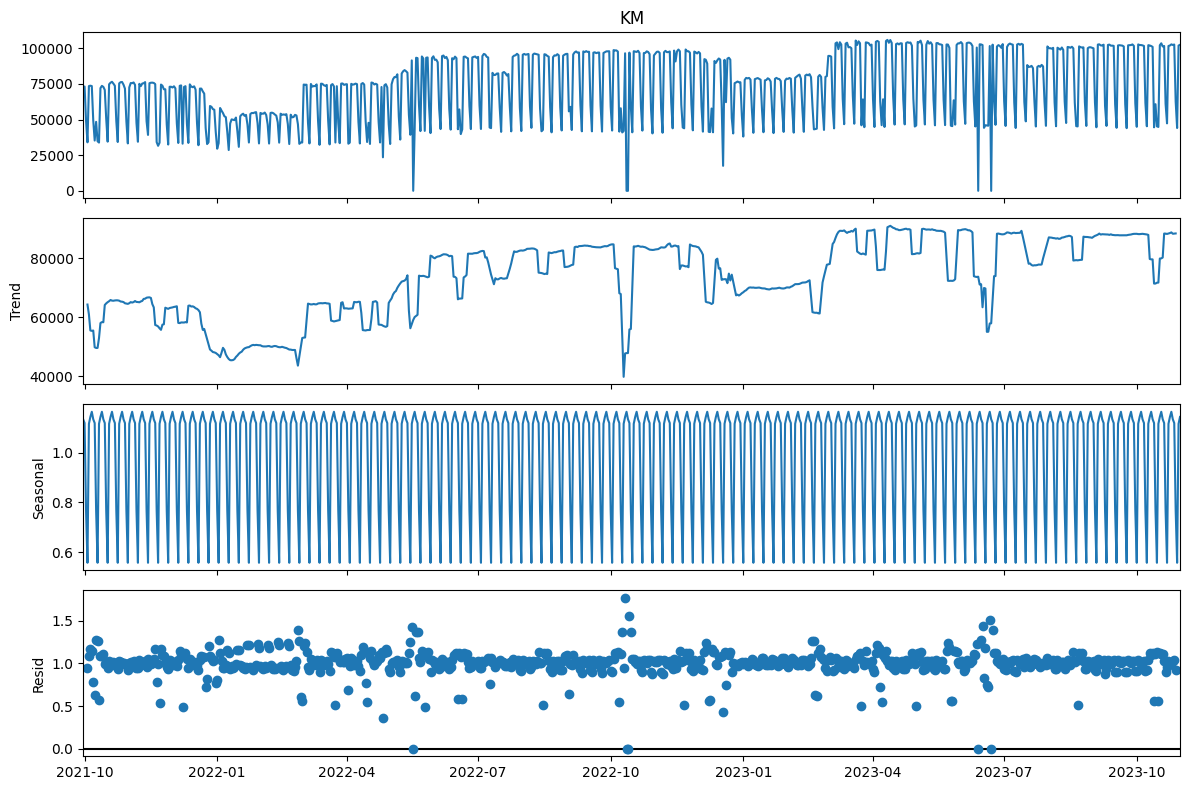

In [27]:
s_dec_multiplicative = seasonal_decompose(df_km.KM, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

No se observa estacionalidad, parece existir una tendencia a la suba.

Representación gráfica de la Función de Autocorrelación

In [28]:
# Módulos a utilizar
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [29]:
matplotlib.rcParams['figure.figsize']=[6.0,4.0]

Grafico ACF de los KM

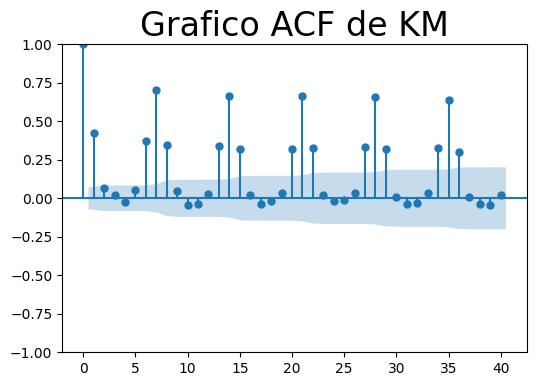

In [30]:
plot_acf(df_km.KM,lags=40)
plt.title("Grafico ACF de KM", size= 24)
plt.show()

Observaciones

El grafico de autocorrelación nos da una primera aproximación de no estacionariedad.
Con 20 lags no se alcanza a percibir el decrecimiento lineal con tendencia a bajar en el tiempo. Se procede a aumentar la cantidad de lags

Grafico ACF del indice "KM" (200 lags)

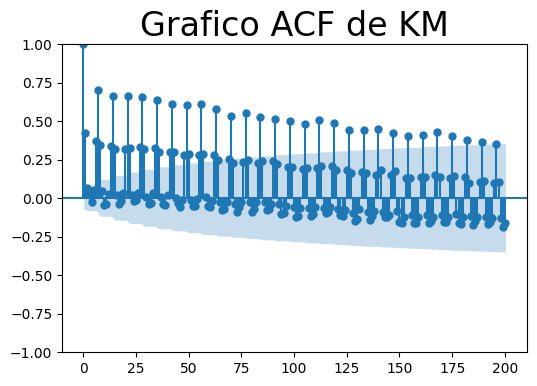

In [31]:
plot_acf(df_km.KM,lags=200)
plt.title("Grafico ACF de KM", size= 24)
plt.show()

APLICAMOS UNA TRANSFORMACION DE LA SERIE

In [32]:
primera_diffs=df_km.KM.values[1:]-df_km.KM.values[:-1]
primera_diffs=np.concatenate([primera_diffs,[0]])

In [33]:
df_km['primera_diffs_km']=primera_diffs

In [34]:
df_km.head()

,KM,primera_diffs_km
Fecha,,
2021-09-30,72933.600,243.590
2021-10-01,73177.190,-23876.934
2021-10-02,49300.256,-15275.284
2021-10-03,34024.972,39428.543
2021-10-04,73453.515,269.120


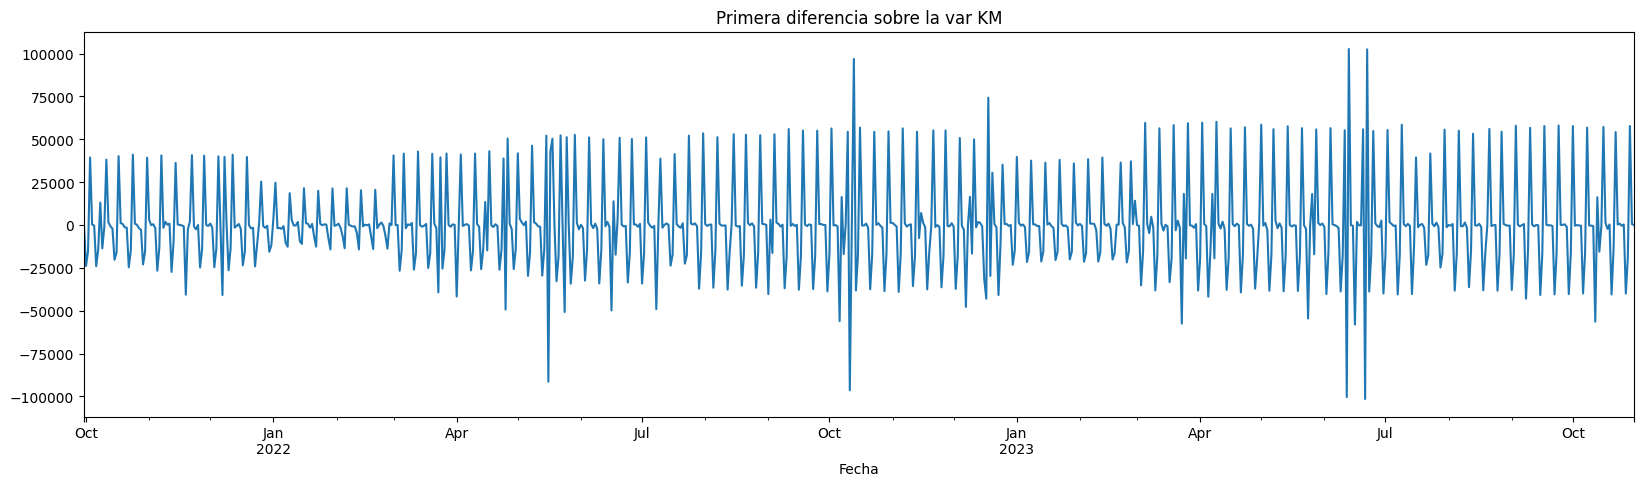

In [35]:
#grafico este indice con las diferencias aplicadas fila a fila
df_km.primera_diffs_km.plot(figsize=(20,5), title = "Primera diferencia sobre la var KM")
plt.show()

Observaciones

La grafica de la primera diferencia de la serie original muestra característica de Ruido blanco

- TIENE REVERSION A LA MEDIA
- VALOR ESPERADO CONSTANTE = 0
- VOLATILIDAD CONSTANTE EN EL TIEMPO

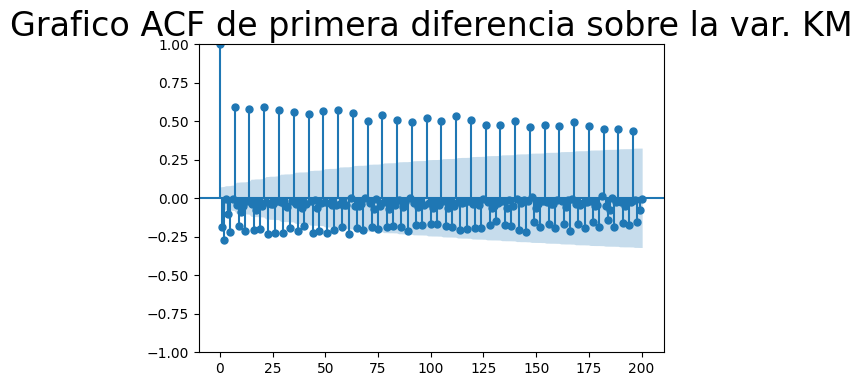

In [36]:
plot_acf(df_km.primera_diffs_km,lags=200)
plt.title("Grafico ACF de primera diferencia sobre la var. KM", size= 24)
plt.show()

*Observación 5*

Vemos en la función de autocorrelación de la primera diferencia de la serie original un cambio no tanto más marcado respecto a la serie original. 
El mismo nos podría dar a la interpretación que estamos en presencia de una serie estacionaria pero se necesitaron 200 lags para reconocer la tendencia. Por lo tanto se necesita testear para llegar a la conclusión definitiva.


Ruido Blanco

In [42]:
wn = np.random.normal(loc = df_km.KM.mean(), scale = df_km.KM.std(), size = len(df_km))
df_km['wn'] = wn
df_km.describe()

,KM,primera_diffs_km,wn
count,762.000000,762.000000,762.000000
mean,73409.667465,38.645722,73211.953321
std,24106.788314,25840.396466,24484.332054
min,1.000000,-101512.827000,-20611.190414
25%,51846.844000,-14496.436500,56438.437665
50%,75188.637000,-403.805500,73873.635070
75%,96902.299500,823.468000,90739.129746
max,105834.661000,102697.108000,136674.762438


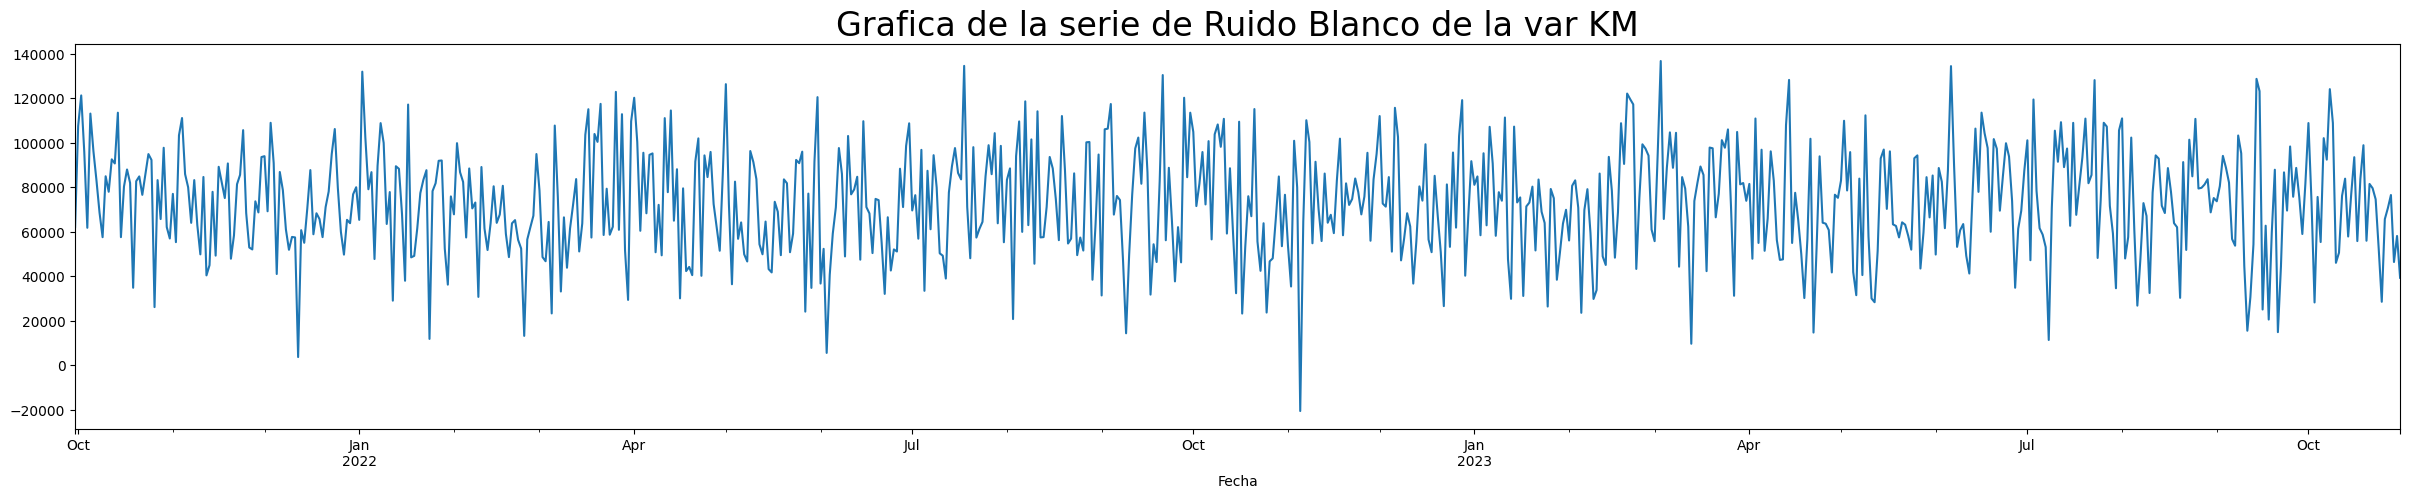

In [43]:
df_km.wn.plot(figsize = (30,5))
plt.title("Grafica de la serie de Ruido Blanco de la var KM", size= 24)
plt.show()

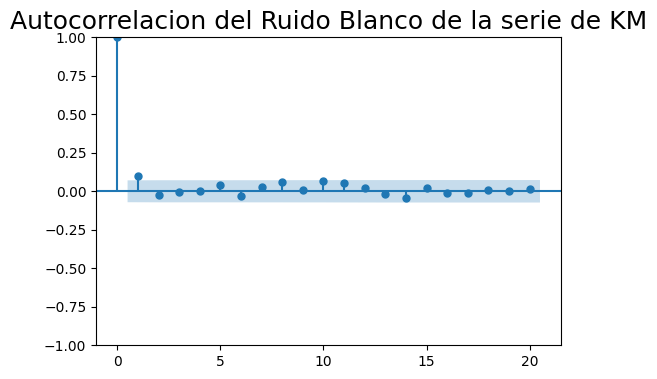

In [44]:
plot_acf(df_km.wn, lags=20)
plt.title("Autocorrelacion del Ruido Blanco de la serie de KM", size= 18)
plt.show()

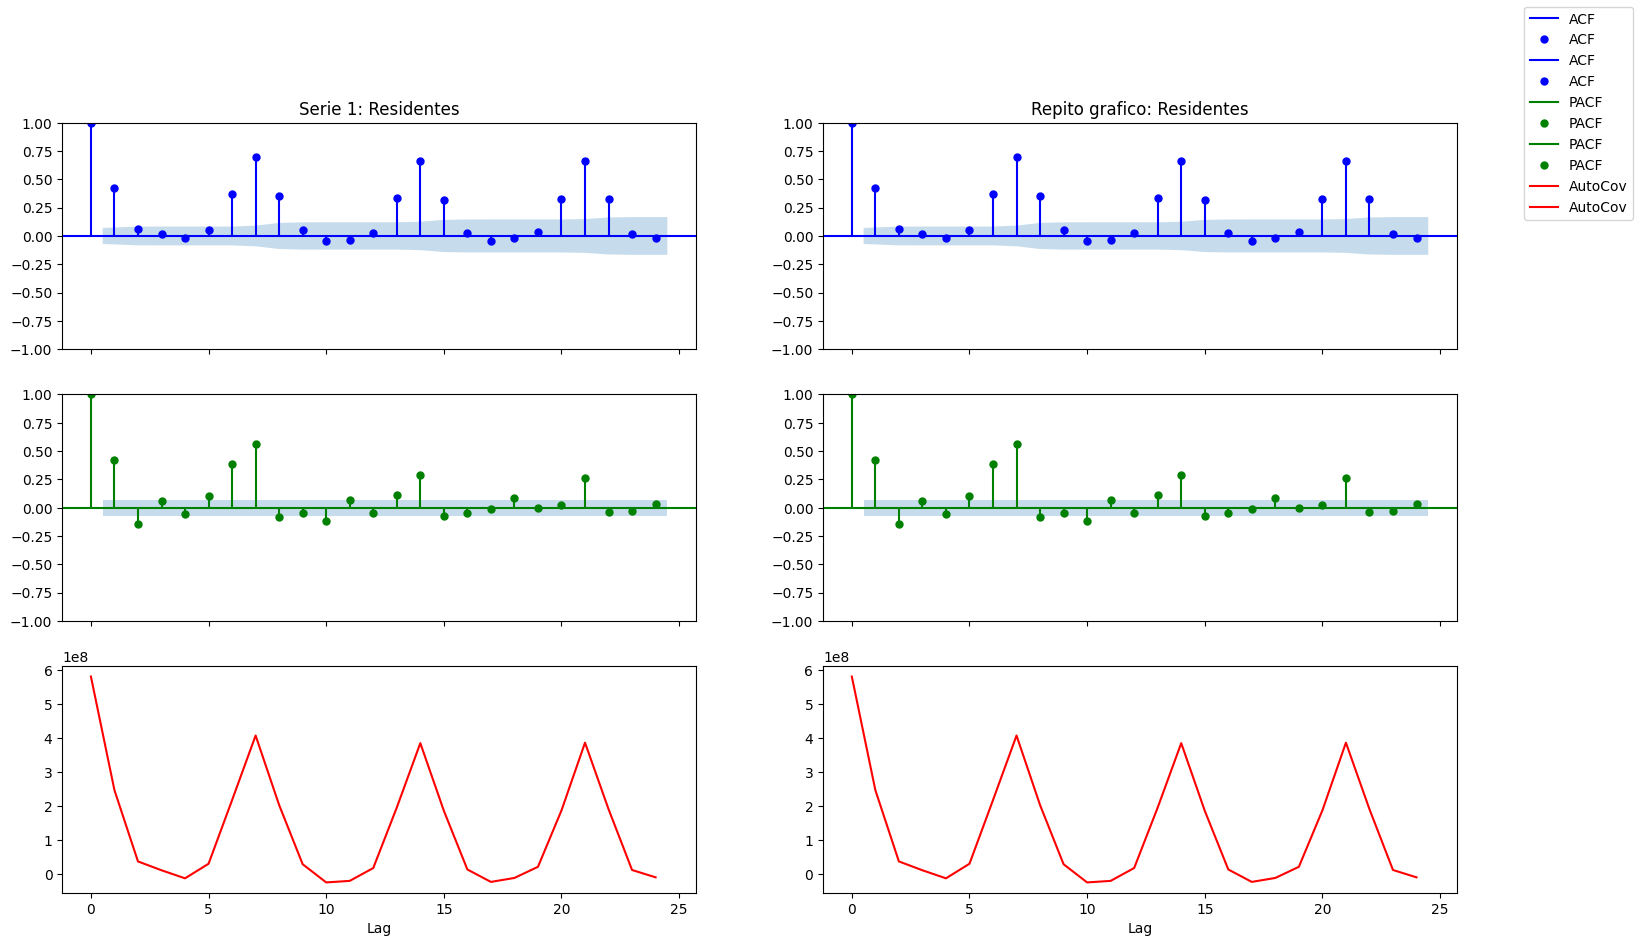

In [53]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.stattools as tsa

autocov_autocorr(df_km.KM, df_km.KM, 24)

In [51]:
## Función para dibujar juntos FAS: autocovarianzas; FAC (autocorrelacion ) y FACP (autocorrelación parcial)
def autocov_autocorr(serie_r,serie_nr, nrol= 75 ):
  p1, axes=plt.subplots(3,2,figsize=(18,10),sharex=True, sharey=False )
  axes[2,0].set_xlabel('Lag')
  axes[2,1].set_xlabel('Lag')

  plot_acf(serie_r, lags=nrol, ax= axes[0,0], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='Serie 1: Residentes')
  plot_pacf(serie_r, lags=nrol, ax= axes[1,0], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,0].plot(tsa.acovf(serie_r,fft=False, nlag=nrol), color='r', label='AutoCov')

  plot_acf(serie_nr, lags=nrol, ax= axes[0,1], color='blue', label="ACF", vlines_kwargs={"colors":'blue'}, title='Repito grafico: Residentes')
  plot_pacf(serie_nr, lags=nrol, ax= axes[1,1], color='green', label="PACF", vlines_kwargs={"colors":'green'}, title='', method='ywm')
  axes[2,1].plot(tsa.acovf(serie_nr,fft=False, nlag=nrol), color='r', label='AutoCov')

  p1.legend()
  plt.show()